<a href="https://colab.research.google.com/github/jordantcarlisle/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example
# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

*  Age = continuous numerical 
*  Weight = continuous numerical 
*  Exercise Time = continuous numerical 


2.  What are the relationships between the variables?

*   Older people tend to exercise for less total time per week, but there are still a good number of elderly people who exercise more than younger people
* Weight and exercise time seem to be inversely correlated, especially with total exercise times beyond two hours a week 

3.  Which relationships are "real", and which spurious?

* I believe that it is real to say that as people get older they become less active
* I also believe that the more people exercise the more likely they are to weight less


In [2]:
#imported pandas to use read csv
#assigned persons_health_data variable to csv of anonymous data about age, weight, and exercise
#how can I rename the headers so that exercise time is distinguished as time per week? 
import pandas as pd 
persons = "https://raw.githubusercontent.com/jordantcarlisle/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"
df = pd.read_csv(persons, names=None)
df

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [3]:
!pip install pandas==0.23.4

In [12]:
#persons crosstabbed with exercise time and age
#you can start to see a trend where there are fewer older people exercise beyond two hours per week
bins = pd.cut(df['exercise_time'], 10) 
pd.crosstab(df['age'],bins)

exercise_time,"(-0.3, 30.0]","(30.0, 60.0]","(60.0, 90.0]","(90.0, 120.0]","(120.0, 150.0]","(150.0, 180.0]","(180.0, 210.0]","(210.0, 240.0]","(240.0, 270.0]","(270.0, 300.0]"
age,,,,,,,,,,
18,1,1,3,3,2,2,2,4,1,1
19,3,2,4,4,1,2,2,3,2,0
20,1,1,3,1,0,3,3,1,2,2
21,0,2,0,2,2,4,1,5,1,1
22,1,3,3,2,4,2,3,1,0,0
23,3,1,2,2,4,3,1,3,1,1
24,1,2,2,1,2,3,2,1,1,2
25,2,2,0,2,1,1,3,3,3,2
26,0,1,1,2,2,0,2,1,4,2


In [9]:
#persons crosstabbed with exercise time and age
#there are no insights that I can easily see in this
weight_bins = pd.cut(df['weight'], 10) 
pd.crosstab(df['age'], weight_bins)

weight,"(99.854, 114.6]","(114.6, 129.2]","(129.2, 143.8]","(143.8, 158.4]","(158.4, 173.0]","(173.0, 187.6]","(187.6, 202.2]","(202.2, 216.8]","(216.8, 231.4]","(231.4, 246.0]"
age,,,,,,,,,,
18,2,5,6,2,2,1,2,0,0,0
19,1,3,2,5,3,3,2,3,1,0
20,3,3,1,3,3,2,1,1,0,0
21,4,1,2,3,4,2,1,1,0,0
22,3,1,5,4,2,1,2,0,0,1
23,3,6,3,2,1,1,4,1,0,0
24,3,3,1,3,4,0,1,0,0,2
25,3,4,2,5,1,1,0,1,2,0
26,2,1,4,5,2,0,0,1,0,0


In [34]:
#persons crosstabbed with exercise time and age
exercise_bins = pd.cut(df['exercise_time'], 10) 
weight_bins = pd.cut(df['weight'], 10) 
wt = pd.crosstab(exercise_bins, weight_bins)
wt

weight,"(99.854, 114.6]","(114.6, 129.2]","(129.2, 143.8]","(143.8, 158.4]","(158.4, 173.0]","(173.0, 187.6]","(187.6, 202.2]","(202.2, 216.8]","(216.8, 231.4]","(231.4, 246.0]"
exercise_time,,,,,,,,,,
"(-0.3, 30.0]",14,12,11,14,13,15,19,22,16,13
"(30.0, 60.0]",13,14,10,9,18,15,11,24,12,3
"(60.0, 90.0]",16,15,22,25,24,23,15,16,8,0
"(90.0, 120.0]",12,22,10,19,23,23,16,26,1,0
"(120.0, 150.0]",21,13,11,12,14,13,19,2,0,0
"(150.0, 180.0]",20,17,21,23,14,15,8,0,0,0
"(180.0, 210.0]",18,19,17,15,12,12,1,0,0,0
"(210.0, 240.0]",20,22,22,20,13,1,0,0,0,0
"(240.0, 270.0]",17,37,20,17,9,0,0,0,0,0


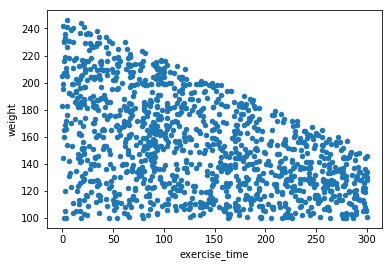

In [41]:
df.plot.scatter('exercise_time', 'weight')

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)